In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
url=filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
data=pd.read_csv(url)
data

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [3]:
df=pd.DataFrame(data)
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [4]:
x=df[["highway-mpg"]]
y=df[["price"]]
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [5]:
yhat=lm.predict(x)

In [6]:
df2=pd.DataFrame(yhat)
df2.head()

,0
0,16236.504643
1,16236.504643
2,17058.238022
3,13771.304508
4,20345.171535


<Axes: xlabel='highway-mpg', ylabel='price'>

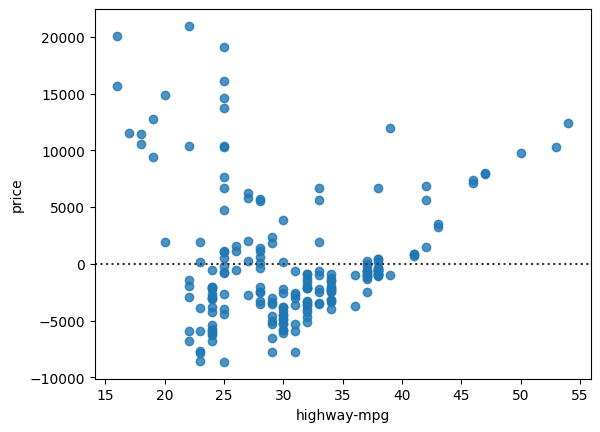

In [7]:
# GRÁFICO RESIDUAL (cada ponto -> valor_real-valor_previsto=valor_residual)
# verifica a variancia entre os valores da previsão e os valores reais
# valores devem estar dispersos entre 0 da mesma forma
# Gráfico abaixo sugere que o grafico de regressão linear entre 2 variaveis não é apropriado

sns.residplot(x=df['highway-mpg'],y=df['price'])

Text(0, 0.5, 'Count Cars')

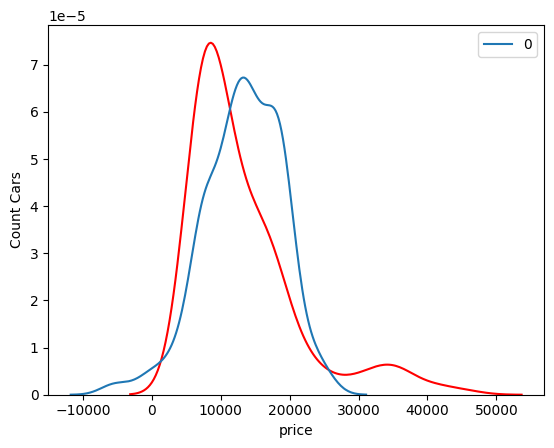

In [8]:
# Gráfico de distribuição, kdeplot só necessita das variáveis

sns.kdeplot(df["price"],color="r")
sns.kdeplot(yhat,color="blue")
plt.ylabel("Count Cars")

In [9]:
z=df[["horsepower","highway-mpg","peak-rpm","wheel-base","curb-weight","engine-size","width"]]
lm.fit(z,y)
yhat=lm.predict(z)

Text(0, 0.5, 'Count Cars')

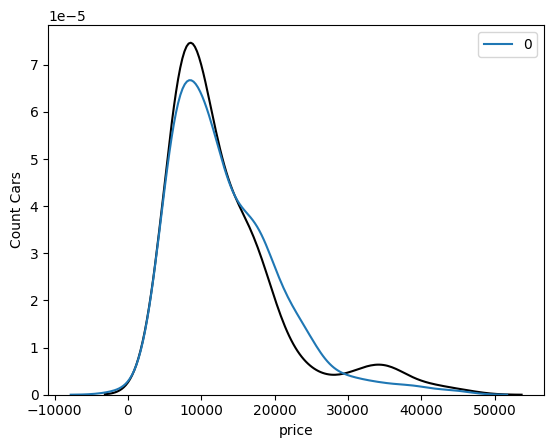

In [10]:
# Usando mais variáveis independentes, o preço previsto aproxima-se mais do preço real

sns.kdeplot(df["price"],color="black")
sns.kdeplot(yhat,color="r")
plt.ylabel("Count Cars")

<Axes: ylabel='price'>

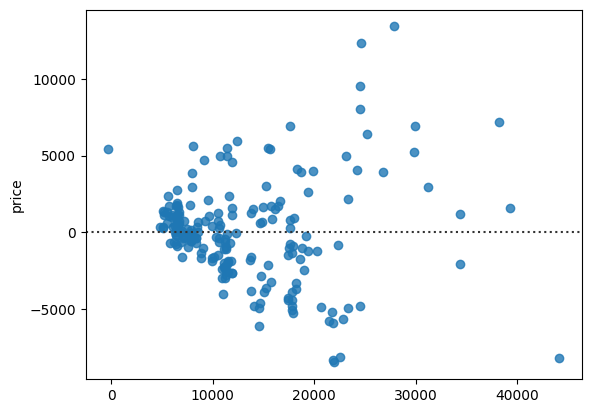

In [11]:
#Como visto acima, este modelo é mais apropriado, podemos confirmar no gráfico residual

sns.residplot(x=yhat,y=df['price'])